In [1]:
# lets import all libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import scipy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns

In [2]:
data_df = pd.read_csv('data_process1.csv')
dataset = data_df
dataset = data_df.as_matrix()
X = dataset[:,0:11]

#last column is the target
y = dataset[:,11:12]

# Standardize data
standardized_X = preprocessing.scale(X)

#standardized_X =preprocessing.normalize(X)

### Train-Test Split

In [3]:
# Divide records again in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y.ravel(), test_size=0.3, random_state=4, stratify=y)

Accuracy is : 0.779069767442

Classification report is :
              precision    recall  f1-score   support

        0.0       0.80      0.82      0.81       195
        1.0       0.76      0.72      0.74       149

avg / total       0.78      0.78      0.78       344



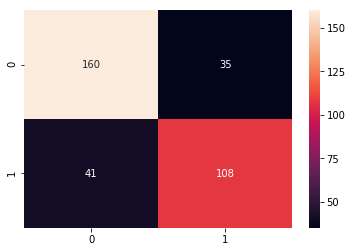

In [4]:
#linear kernel
svmlinear = SVC(kernel='linear', C = 0.624974423446755)
svmlinear.fit(X_train, y_train)  
y_true, y_pred = y_test, svmlinear.predict(X_test)

# get the accuracy
print("Accuracy is :",accuracy_score(y_true, y_pred))

# classification report
print("\nClassification report is :\n",classification_report(y_true, y_pred))

# confusion matrix
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt="d")


Accuracy is : 0.834302325581

Classification report is :
              precision    recall  f1-score   support

        0.0       0.84      0.88      0.86       195
        1.0       0.83      0.78      0.80       149

avg / total       0.83      0.83      0.83       344



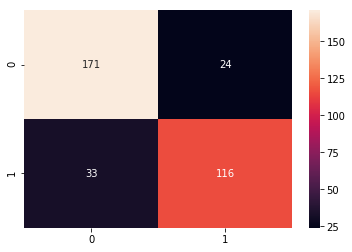

In [5]:
#rbf kernel
svmrbf = SVC(kernel='rbf', gamma=0.004059323094735449, C=57.296107349133315)
svmrbf.fit(X_train, y_train)  
y_true, y_pred = y_test, svmrbf.predict(X_test)

# get the accuracy
print("Accuracy is :",accuracy_score(y_true, y_pred))

# classification report
print("\nClassification report is :\n",classification_report(y_true, y_pred))

# confusion matrix
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is : 0.709302325581

Classification report is :
              precision    recall  f1-score   support

        0.0       0.68      0.92      0.78       195
        1.0       0.81      0.43      0.56       149

avg / total       0.74      0.71      0.69       344



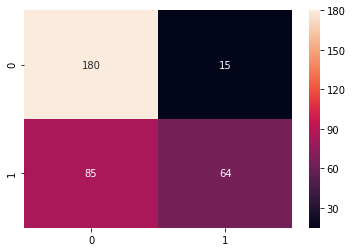

In [6]:
#poly kernel
svmpoly = svm.SVC(kernel='poly', degree=3, C=44.862787773900145,gamma=0.017893797724654898)
svmpoly.fit(X_train, y_train)  
y_true, y_pred = y_test, svmpoly.predict(X_test)

# get the accuracy
print("Accuracy is :",accuracy_score(y_true, y_pred))

# classification report
print("\nClassification report is :\n",classification_report(y_true, y_pred))

# confusion matrix
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

### Cross validation of 10

In [7]:
models = (svm.SVC(kernel='linear', C=0.624974423446755),
          svm.SVC(kernel='rbf', gamma=0.004059323094735449, C=57.296107349133315),
          svm.SVC(kernel='poly', degree=3, C=44.862787773900145,gamma=0.017893797724654898))
models = (clf.fit(standardized_X, y.ravel()) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

for clf, title in zip(models, titles):
    cv_error = np.average(cross_val_score(clf, standardized_X, y.ravel(), cv=10))
    print(title)
    print('\nThe {}-fold cross-validation accuracy score for classifier is {:.2f}\n*********************'.format(10, cv_error))
    

SVC with linear kernel

The 10-fold cross-validation accuracy score for classifier is 0.72
*********************
SVC with RBF kernel

The 10-fold cross-validation accuracy score for classifier is 0.76
*********************
SVC with polynomial (degree 3) kernel

The 10-fold cross-validation accuracy score for classifier is 0.65
*********************
